In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("cleaned_data.csv")

In [5]:
data=data.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [6]:
# Choosing relevant columns
df_model=data[["Salary_mean","Rating","Size","Type of ownership","Industry","Sector","Revenue","Location State","age"
               ,"python","spark","excel","clean_job_title","desc_length"]]

In [7]:
# Get dummy variables
df_dummies=pd.get_dummies(df_model)

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
sns.scatterplot(x=df_model["Rating"],y=df_model["Salary_mean"])

In [ ]:
df_model.corr()

In [9]:
X=df_dummies.drop(columns="Salary_mean")
y=df_dummies["Salary_mean"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Multiple Linear Regression

import statsmodels.api as sm

In [11]:
X_sm=X=sm.add_constant(X)


C:\Users\marli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
model = sm.OLS(y,X_sm,missing="raise")
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     241.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.07e-48
Time:                        00:16:15   Log-Likelihood:                -748.30
No. Observations:                  79   AIC:                             1539.
Df Residuals:                      58   BIC:                             1588.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Rating                                         -3.692e+04   1510.513    -24.444      0.000   -3.99e+04   -3.39e+04
age                                             2039.2036    228.127      8.939      0.000    1582.557    2495.850
python                                         -3.997e+04   4456.411     -8.968      0.000   -4.89e+04    -3.1e+04
spark                                           7165.2366   1266.642      5.657      0.000    4629.777    9700.696
excel                                           1.861e+04   2152.719      8.646      0.000    1.43e+04    2.29e+04
desc_length                                       -6.4775      0.590    -10.987      0.000      -7.658      -5.297
Size_1 to 50 Employees                          3.425e+04   2103.137     16.287      0.000       3e+04    3.85e+04
Size_10000+ Employees                          -3.626e+04   6955.643     -5.212      0.000   -5.02e+04   -2.23e+04
Size_1001 to 5000 Employees                     3158.5171   2021.560      1.562      0.124    -888.076    7205.110
Size_201 to 500 Employees                       2.399e+04   1889.362     12.695      0.000    2.02e+04    2.78e+04
Size_5001 to 10000 Employees                    3.631e+04   2490.785     14.579      0.000    3.13e+04    4.13e+04
Size_501 to 1000 Employees                      1.561e+04   1469.453     10.624      0.000    1.27e+04    1.86e+04
Size_51 to 200 Employees                       -1241.9757   2318.465     -0.536      0.594   -5882.888    3398.937
Size_Unknown                                    5341.6120   1801.581      2.965      0.004    1735.357    8947.867
Type of ownership_College / University         -5.501e+04   6813.918     -8.073      0.000   -6.86e+04   -4.14e+04
Type of ownership_Company - Private             4.929e+04   2499.169     19.721      0.000    4.43e+04    5.43e+04
Type of ownership_Company - Public              1.003e+05   6481.912     15.473      0.000    8.73e+04    1.13e+05
Type of ownership_Government                    4.165e+04   1899.513     21.929      0.000    3.79e+04    4.55e+04
Type of ownership_Nonprofit Organization       -8.154e+04   6182.605    -13.189      0.000   -9.39e+04   -6.92e+04
Type of ownership_Unknown                       2.648e+04   2166.615     12.222      0.000    2.21e+04    3.08e+04
Industry_-1                                     7773.2729    936.665      8.299      0.000    5898.335    9648.211
Industry_Colleges & Universities               -5.501e+04   6813.918     -8.073      0.000   -6.86e+04   -4.14e+04
Industry_Computer Hardware & Software           1.164e+04   1660.832      7.010      0.000    8318.711     1.5e+04
Industry_Consumer Product Rental                5310.0971   1776.792      2.989      0.004   

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
lm=LinearRegression().fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

-1713656649815.1458

#### We are off by about $20.613 on average

In [15]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [16]:
lm_lasso=Lasso()

In [17]:
np.mean(cross_val_score(lm_lasso,X_train, y_train, scoring='neg_mean_absolute_error'))

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96651011.78232297, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84311547.69472498, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99119435.06416012, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

-10637.909517955264

In [18]:
alpha=[]
error=[]
for i in range(1,50):
    alpha.append(i/100)
    lm_l=Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lm_l,X_train, y_train, scoring='neg_mean_absolute_error')))

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36261439.33087404, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33628495.0029758, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45160278.41981999, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10121203.530438399, tolerance: 4001682.1988745104
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40238246.716493756, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37200796.43799232, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55667653.08586907, tolerance: 4822638.278329412
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13838864.905119438, tolerance: 4001682.1988745104
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44121894.106998235, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54003939.14662293, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59610089.58883387, tolerance: 4822638.278329412
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17373834.269548435, tolerance: 4001682.1988745104
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46726188.60669529, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57349759.99267952, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63445177.48098935, tolerance: 4822638.278329412
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obje

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55264349.52479928, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49838991.524100505, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60591226.584367916, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58958098.52012981, tolerance: 4161553.810728
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52855017.42256668, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63967841.8686648, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58443060.44687857, tolerance: 3986064.507592
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70059615.7413657, tolerance: 4489557.82605
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78213290.63405342, tolerance: 4822638.278329412
  model = cd_fast.enet_coordinate_descent(
C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

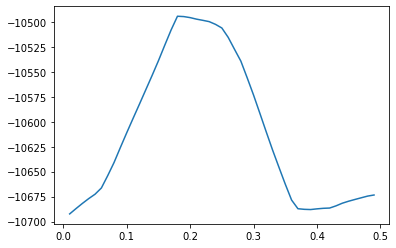

In [19]:
plt.plot(alpha,error)

In [20]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=["alpha","error"])
df_err[df_err["error"]==df_err["error"].max()]

,alpha,error
17,0.18,-10494.384433


In [24]:
lm_lasso=Lasso(alpha=df_err.iloc[df_err["error"].idxmax(),0]).fit(X_train,y_train)

C:\Users\marli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59610978.89436226, tolerance: 5387348.398971428
  model = cd_fast.enet_coordinate_descent(


#### With the Lasso technique and an alpha of 0.04, we are off by about $20.000, which is an improvement from the OLS

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf=RandomForestRegressor()
(np.mean(cross_val_score(rf,X_train, y_train, scoring='neg_mean_absolute_error')))

-3610.1993076923072

#### With the Random Forest algorithm we get an error of about $14.500

In [27]:
# Tune models Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'n_estimators':range(10,300,10),'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs=GridSearchCV(rf,parameters,scoring="neg_mean_absolute_error")
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [29]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(n_estimators=240)

#### After tuning the parameters of the Random Forest, we come up with an error of about $13.950

In [30]:
# Test ensembles
tpred=lm.predict(X_test)
tpred_lasso=lm_lasso.predict(X_test)
tpred_rf=gs.best_estimator_.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,tpred)

48553184735219.18

In [32]:
mean_absolute_error(y_test,tpred_lasso)

8684.844827593648

In [33]:
mean_absolute_error(y_test,tpred_rf)

5218.335677083334

### So, the Random Forest model produces the best results

In [34]:
# We can try to combine the above models
mean_absolute_error(y_test,(tpred_lasso+tpred_rf)/2)

6208.1332156111075